In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import multiprocessing as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv(R'C:/Users/yigit/OneDrive/Belgeler/GitHub/FlightPricePrediction/FlightPricePrediction.csv')



In [19]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Flight Number: Sayısal indeks veya satır numarası.

airline: Havayolu şirketi adı (örn. "SpiceJet" veya "AirAsia").

flight: Uçuş numarası veya kodu (örn. "SG-8709" veya "I5-764").

source_city: Kalkış şehri (örn. "Delhi").

departure_time: Kalkış zamanı (örn. "Evening" veya "Early_Morning").

stops: Uçuşta yapılan duraklama sayısı veya "zero" (duraksız uçuşlar için).

arrival_time: Varış zamanı (örn. "Night" veya "Morning").

destination_city: Varış şehri (örn. "Mumbai").

class: Uçuş sınıfı (örn. "Economy").

duration: Uçuş süresi (örn. 2.17 saat).

days_left: Uçuşa kaç gün kaldığı bilgisi (örn. 1 gün).

price: Uçuşun fiyatı (örn. 5953).

In [20]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [21]:
df.shape

(300153, 12)

In [22]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [23]:
columns_to_drop = ['Unnamed: 0','arrival_time', 'days_left','departure_time','flight','duration']
df = df.drop(columns=columns_to_drop)

In [24]:
df.head(100)

,airline,source_city,stops,destination_city,class,price
0,SpiceJet,Delhi,zero,Mumbai,Economy,5953
1,SpiceJet,Delhi,zero,Mumbai,Economy,5953
2,AirAsia,Delhi,zero,Mumbai,Economy,5956
3,Vistara,Delhi,zero,Mumbai,Economy,5955
4,Vistara,Delhi,zero,Mumbai,Economy,5955
...,...,...,...,...,...,...
95,Vistara,Delhi,one,Mumbai,Economy,17610
96,Air_India,Delhi,one,Mumbai,Economy,17295
97,Vistara,Delhi,one,Mumbai,Economy,17663
98,Air_India,Delhi,one,Mumbai,Economy,18030


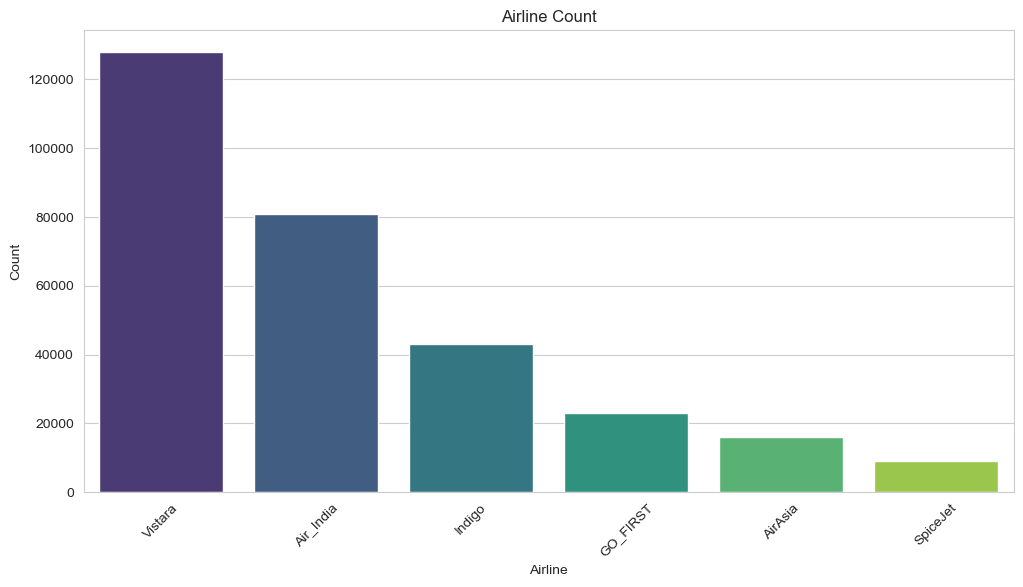

In [25]:
airline_count = df['airline'].value_counts()

# Create the bar plot using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
sns.barplot(x=airline_count.index, y=airline_count.values, palette='viridis')

# Customize the plot
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability


plt.show()

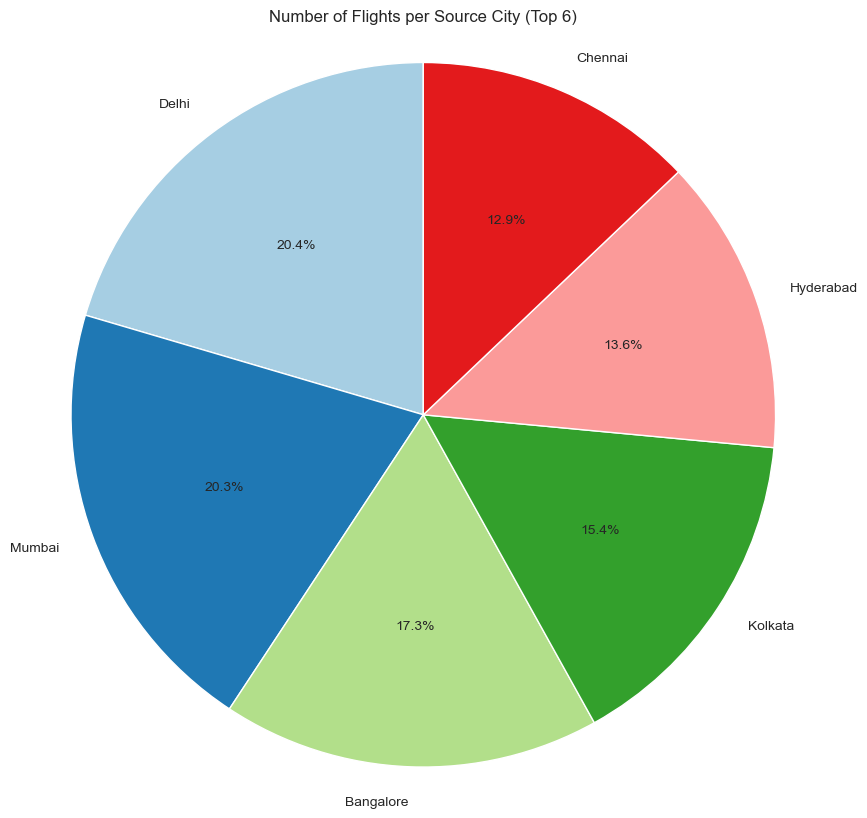

In [26]:

# Create a new figure
plt.figure(figsize=(10, 10))

top_cities = df['source_city'].value_counts().head(10)

# Create the pie chart
colors = plt.cm.Paired(range(len(top_cities)))
plt.pie(top_cities, labels=top_cities.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal, so the pie chart appears circular
plt.axis('equal')

# Add a title to the chart
plt.title('Number of Flights per Source City (Top 6)')

plt.show()

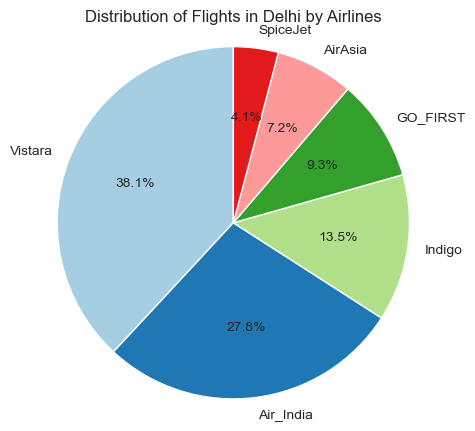

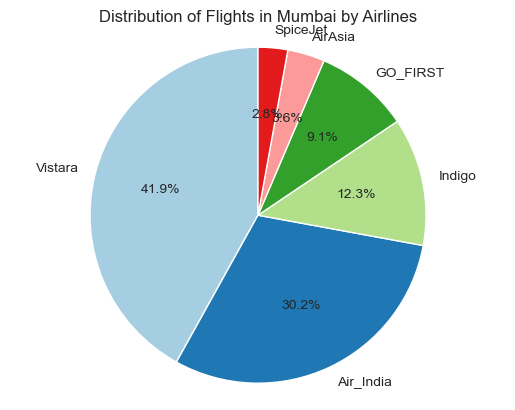

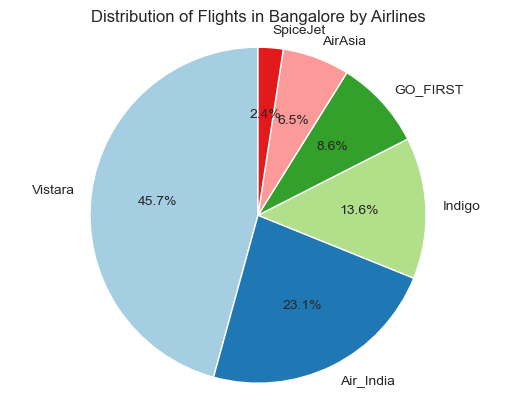

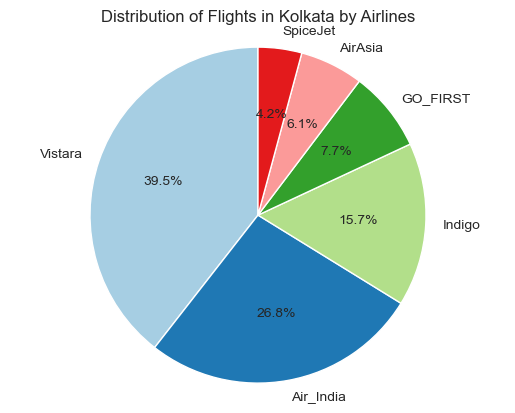

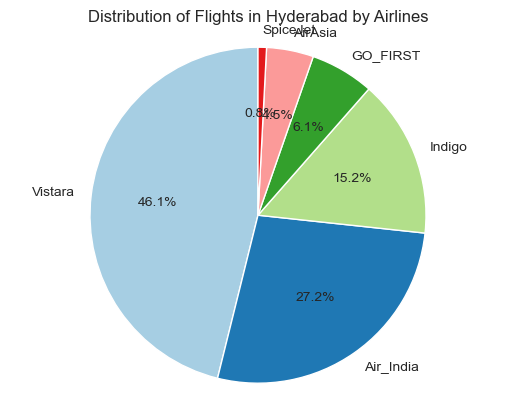

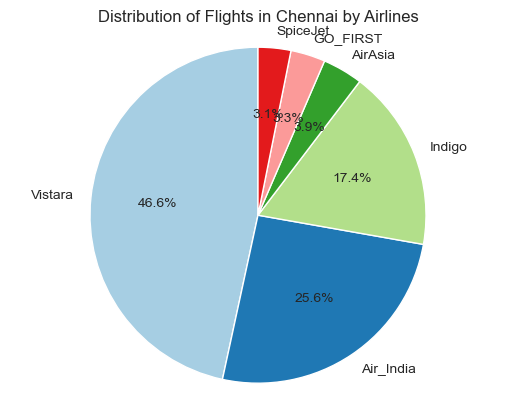

In [27]:




# Get the unique source cities in the DataFrame
source_cities = df['source_city'].unique()

plt.figure(figsize=(5, 5))

# Loop through each source city and create the pie chart for the distribution of flights among all airlines
for city in source_cities:
    selected_city_data = df[df['source_city'] == city]
    airline_counts = selected_city_data['airline'].value_counts()

    colors = plt.cm.Paired(range(len(airline_counts)))
    plt.pie(airline_counts, labels=airline_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

    # Set aspect ratio to be equal, so the pie chart appears circular
    plt.axis('equal')

    plt.title(f'Distribution of Flights in {city} by Airlines')

    
    plt.show()


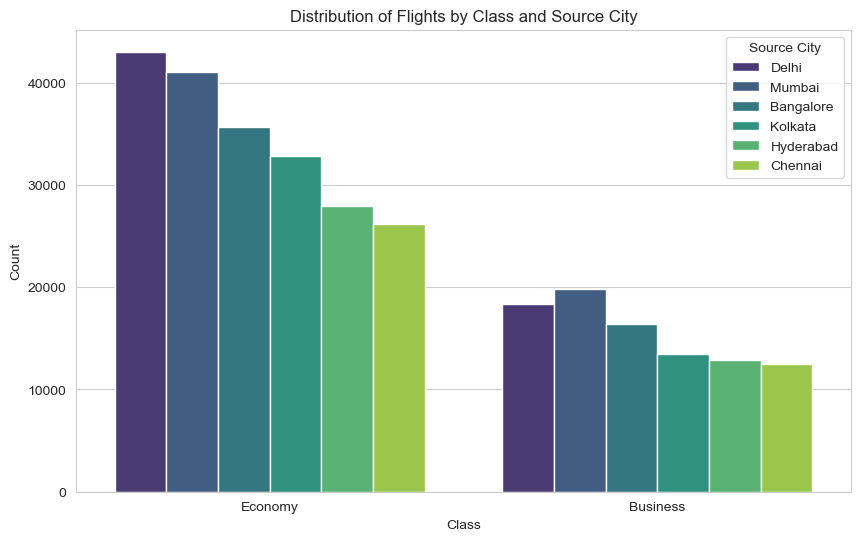

In [28]:

# Create a countplot to visualize the distribution of flights by 'class'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', hue='source_city', palette='viridis')

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Flights by Class and Source City')
plt.legend(title='Source City', loc='upper right')


plt.show()


In [29]:



df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


df_sampled = df.sample(n=1000)  # You can adjust the number of data points as needed


fig_scatter = px.scatter(df_sampled, x='airline', y='price', color='class', hover_data=['source_city', 'destination_city'], 
                         title='Flight Prices by Airline and Class', labels={'airline': 'Airline', 'price': 'Price', 'class': 'Class',
                                                                             'source_city': 'Source City', 'destination_city': 'Destination City'})


fig_scatter.update_layout({'yaxis': {'tickprefix': '$'}})


fig_scatter.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_title_standoff=10)


average_prices = df.groupby(['airline', 'class'])['price'].mean().reset_index()


fig_bar = px.bar(average_prices, x='airline', y='price', color='class', barmode='group', 
                 labels={'airline': 'Airline', 'price': 'Average Price', 'class': 'Class'},
                 title='Average Flight Prices by Airline and Class',
                 color_discrete_map={'Economy': 'blue', 'Business': 'red'})  # Renkleri doğru şekilde atadık
fig_bar.update_layout({'yaxis': {'tickprefix': '$'}})  # Dolar simgesi ekledik


fig_scatter.show()
fig_bar.show()


In [30]:
df['price'] = df['price'].replace({'\$': '', ',': '', 'k': '000'}, regex=True).astype(float)

# Ortalama fiyatları hesaplayıp veri çerçevesini oluşturmak
average_prices = df.groupby(['destination_city'])['price'].mean().reset_index()
average_prices['price'] = round(average_prices['price'], 2)  # Fiyatları 2 basamaklı yuvarlama

# Bar plot ile bütün ülkelerin ortalama fiyatlarını görselleştirmek
fig_bar = px.bar(average_prices, x='destination_city', y='price', 
                 labels={'destination_city': 'Destination City', 'price': 'Average Price'},
                 title='Average Flight Prices by Destination City')

# Düzeltme: Dolar simgesi eklemek
fig_bar.update_layout({'yaxis': {'tickprefix': '$'}})

# Show the interactive bar plot
fig_bar.show()

In [38]:
df = pd.read_csv(R'C:\Users\yigit\OneDrive\Belgeler\GitHub\FlightPricePrediction\FlightPricePrediction.csv')


columns_to_drop = ['Unnamed: 0','arrival_time', 'days_left','departure_time','flight','duration']
df = df.drop(columns=columns_to_drop)

print(df.info())

# Eksik değerleri doldur
df['price'].fillna(df['price'].mean(), inplace=True)

# Kategorik değişkenleri label encoding yapın
label_encoder = LabelEncoder()
df['airline'] = label_encoder.fit_transform(df['airline'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['class'] = label_encoder.fit_transform(df['class'])

# Bağımsız değişkenler ve hedef değişkeni belirleyin
X = df.drop(columns=['price'])
y = df['price']

# Verileri eğitim ve test kümelerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Test kümesi üzerinde tahminler yapın
y_pred = model.predict(X_test)

# Modelin başarı oranını değerlendirin (örneğin, R-kare)
score = model.score(X_test, y_test)
print("Modelin başarı oranı (R-kare):", score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   stops             300153 non-null  object
 3   destination_city  300153 non-null  object
 4   class             300153 non-null  object
 5   price             300153 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
None
Modelin başarı oranı (R-kare): 0.8971137920832801
